# Explore here

In [37]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:


file = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(file)
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
df.shape
df.info()

contain_na = df.isna().any().any()
print(f"Does the dataset contain NAs? : ", contain_na)
for column in df.columns:
    if df[column].isna().any():
        print(f"Column '{column}' contains NaN values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# checkear que los valores tienen sentido
# last_review está en formato object, y no en date-time, so we need to address it
print(df.shape)
print(df.isnull().sum())
print("The columns last_review and reviews_per_month have a significant amount of nulls")
print("This is probably related to the houses that have 0 reviews")

(48895, 16)
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
The columns last_review and reviews_per_month have a significant amount of nulls
This is probably related to the houses that have 0 reviews


In [5]:
df_rev = df.loc[df['number_of_reviews'] == 0, ['reviews_per_month','last_review']]

# change this from NaN to 0

print(df_rev.shape)
print("We observe that this filtered dataset contains all the null values previously seen on the compared variables")

if df_rev['last_review'].sum() == df_rev['reviews_per_month'].sum():
    print(True)

# replacing null values with zeros and dropping the last_review column

df['reviews_per_month'].fillna(0, inplace=True)
df.drop(columns='last_review', axis=1, inplace=True)
print(df.isnull().sum())


(10052, 2)
We observe that this filtered dataset contains all the null values previously seen on the compared variables
True
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


C:\Users\34616\AppData\Local\Temp\ipykernel_5824\2323523313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [12]:
df['room_type'].unique()
# convertir los roomtypes en numberos (1, 2, 3)
print(df.duplicated().sum())



0


In [7]:
# Replacing null values in names for Unknown
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


C:\Users\34616\AppData\Local\Temp\ipykernel_5824\3119463327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
C:\Users\34616\AppData\Local\Temp\ipykernel_5824\3119463327.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [17]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB
None


In [21]:

print(df['neighbourhood'].unique())
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())





['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [36]:
print(df.neighbourhood.value_counts().head(10))
print(df.room_type.value_counts())
print(df.neighbourhood_group.value_counts())



neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


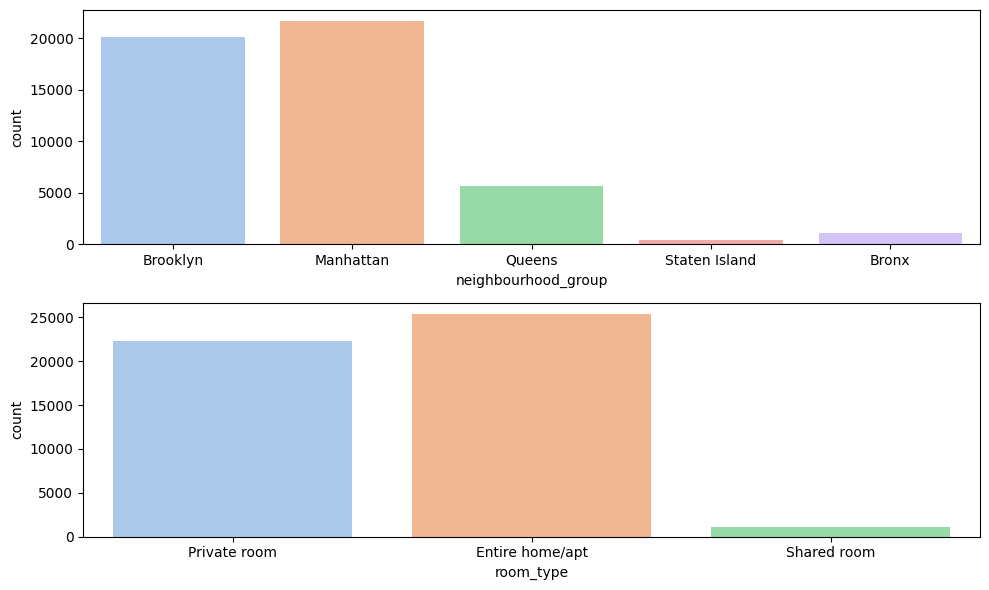

In [43]:
fig, axis = plt.subplots(2, figsize=(10,6))
sns.countplot(ax = axis[0], data = df, x = 'neighbourhood_group', palette='pastel', hue='neighbourhood_group', legend=False)
sns.countplot(ax = axis[1], data = df, x = 'room_type', palette='pastel', hue='room_type', legend=False)

plt.tight_layout()
plt.show()


In [44]:
df.describe()
print("number_of_reviews, minimum_nights, calculated_host_listings_count, availability_365, price")

number_of_reviews, minimum_nights, calculated_host_listings_count, availability_365, price


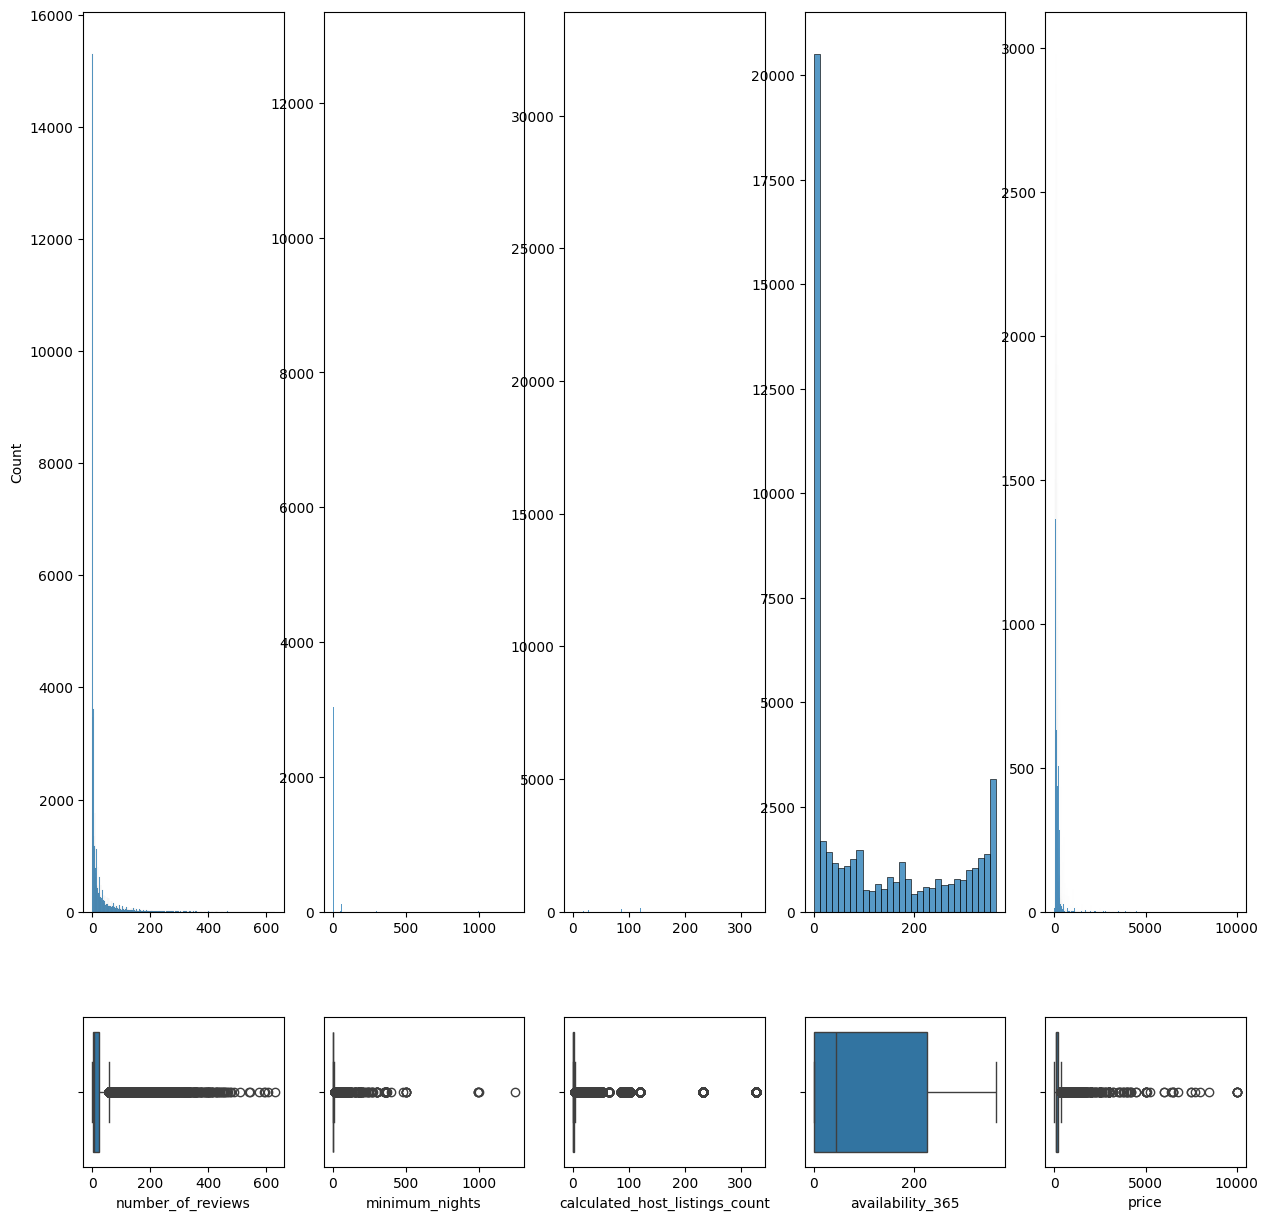

In [46]:
fig, axis = plt.subplots(2, 5, figsize = (15, 15), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[0, 3], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "availability_365")

sns.histplot(ax = axis[0, 4], data = df, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 4], data = df, x = "price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [59]:
zeros = df['availability_365'] == 0

print((zeros.sum()/len(df))*100)

zero_revs = df['number_of_reviews'] == 0
print(zero_revs.sum())

35.858472236424994
10052


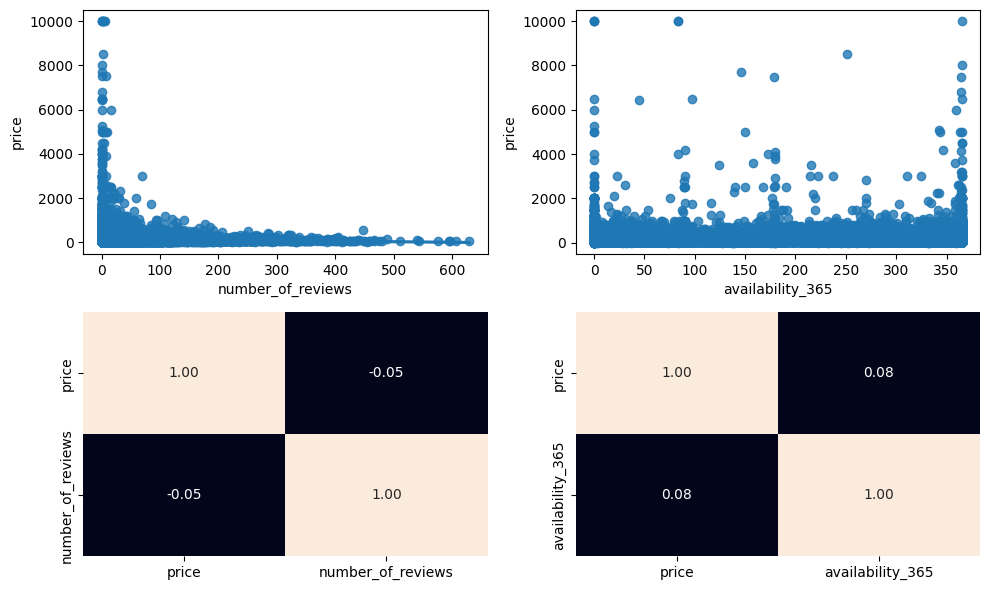

In [62]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.regplot(ax = axis[0, 0], data = df, x='number_of_reviews', y = 'price')
sns.heatmap(df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', ax = axis[1, 0], cbar = False )

sns.regplot(ax = axis[0, 1], data = df, x='availability_365', y = 'price')
sns.heatmap(df[['price', 'availability_365']].corr(), annot=True, fmt='.2f', ax = axis[1, 1], cbar = False )


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


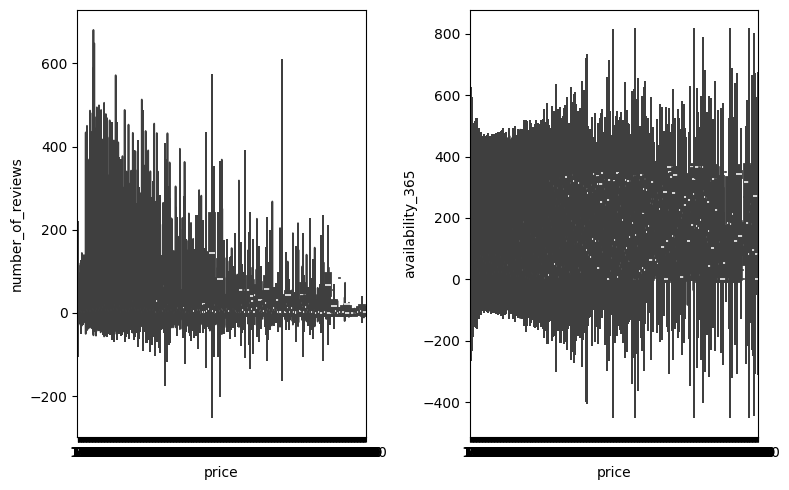

In [64]:
fig, axis = plt.subplots(1, 2, figsize = (8, 5))

sns.violinplot(ax = axis[0], x='price', y='number_of_reviews', data=df)
sns.violinplot(ax = axis[1], x='price', y='availability_365', data=df)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

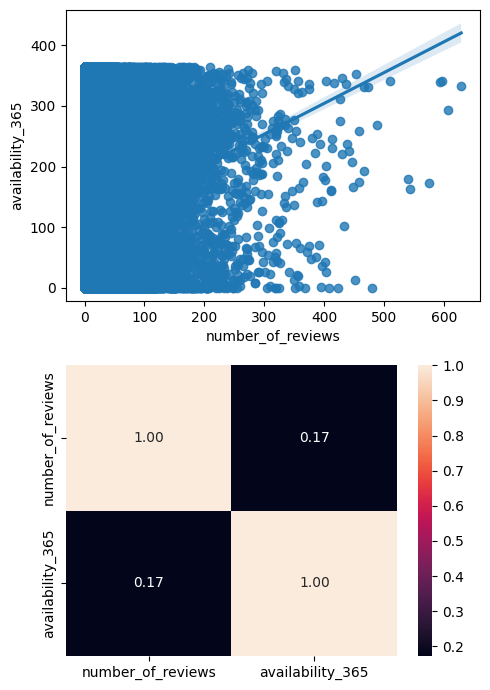

In [65]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = "availability_365")
sns.heatmap(df[["number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

